# **<font color='red'>Libraries and common functions</font>**

---

In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# upload sample_network.csv
from google.colab import files
uploaded = files.upload()

Saving sample_network.csv to sample_network.csv


In [0]:
# !rm sample_network.csv

In [0]:
def graph(dataframe,col1,col2):
  G = nx.from_pandas_edgelist(dataframe, source=col1, target=col2,edge_attr=True,create_using=nx.Graph) 
  return G

#calculate attribute of different paths between origin and destiny and find path which attribute is less  
def short_path(G,nS,nD,attr):
  sp=nx.shortest_path(G, source=nS, target=nD,weight=attr)
  return sp 

def cal_len(graph,path,attribute):
  weight=0
  for i in range(len(path)-1):
    weight+=graph[path[i]][path[i+1]][attribute]
  return weight  

def evaluation(graph,path,origin,destiny,attribute):
  w=cal_len(graph,path,attribute)
  print(attribute,'between',origin,'and',destiny,'is:',w)

def color_path(graph,path):
  c=['lime' if x in path else 'salmon' for x in graph.nodes()]   
  return c      

def draw_Graph(graph,color='salmon'):
  plt.figure(figsize=(12,6.5))
  nx.draw_networkx(graph,node_color=color,with_labels=True)
  plt.show()

def find_sp(G,nS,nD,attr):
  sp=short_path(G,nS,nD,attr)
  print(sp)
  evaluation(G,sp,nS,nD,attr)
  c=color_path(G,sp)
  draw_Graph(G,c)

In [0]:
#a list of shortest paths from a given node to all other nodes
def list_shortest(G,node,attr):
  list=[]
  for x in G.nodes():
    if x != node:
      list.append(short_path(G,node,x,attr))
  return list   

#list of all geodesics
def list_all_shortest(G,attr):
  list=[]
  for node in G.nodes():
     list.extend(list_shortest(G,node,attr))
  return list 

###Degree Connectivity 

In [0]:
def degree(G,node):
  return G.degree(node)

###Closeness Centrality

In [0]:
#the average length of the shortest path from the node to all other nodes
def av_sp(G,node,attr):
  lsp=list_shortest(G,node,attr)
  av=0
  for sp in lsp:
    av+=cal_len(G,sp,attr)
  av=av/(len(G.nodes)-1)
  return av  

###Betweenness Centrality

In [0]:
#Number of times a node is present in the shortest path between 2 other nodes
def nb_times_node(G,node,attr):
  lallsp=list_all_shortest(G,attr)
  count=0
  for i in range(len(lallsp)):
    if node in lallsp[i] and node!=lallsp[i][0] and node!=lallsp[i][-1]:
      count+=1
  return count

###Network Density

In [0]:
def density(G):
  N=len(G.nodes)
  deg=0
  for node in G.nodes():
    deg+=G.degree(node)
  return deg/(N*(N-1))  

###Network Diameter

In [0]:
#the longest of all its geodesics
def longest_geodesic(G,attr):
  lallsp=list_all_shortest(G,attr)
  longest=0
  for sp in lallsp:
    length=cal_len(G,sp,attr)
    if(longest<length):
      longest=length
  return longest    

###Network Average Path Length

In [0]:
#the average of all geodesics
def av_all_sp(G,attr):
  N=len(G.nodes)
  lallsp=list_all_shortest(G,attr)
  av=0
  for sp in lallsp:
    av+=cal_len(G,sp,attr)
  av=av/(N*(N-1))
  return av    

###<font color='red'>Edmonds Karp algorithm</font>

In [0]:
# find max flow
def edmonds_karp(G, source, sink, attr):
    R = nx.algorithms.flow.edmonds_karp(G, source, sink, capacity=attr)
    mf = R.graph['flow_value']
    return mf

#**<font color='red'>Sample_network.csv</font>**
---
dataset have a sample of nodes with a fictional average rate Kbps for communication between each pair (edge’s attribute).




In [5]:
df=pd.read_csv('sample_network.csv')
df

,Source,Sink,Kbps_AVG
0,2,1,74752
1,3,2,79872
2,4,2,102400
3,5,2,30720
4,6,2,25600
...,...,...,...
319,96,91,29696
320,93,92,82944
321,94,92,84992
322,94,93,65536


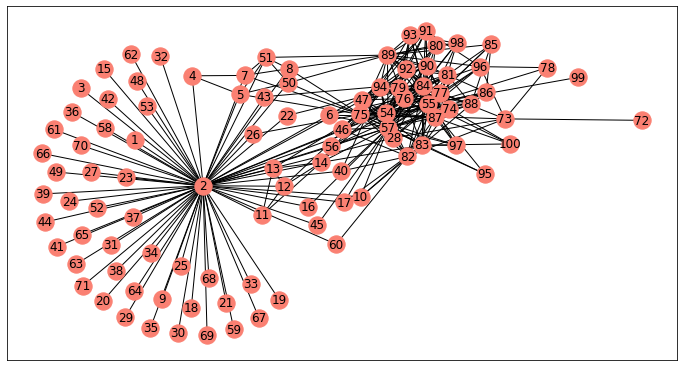

In [6]:
G=graph(df,'Source','Sink')
draw_Graph(G)

[1, 2, 14, 83, 100]
Kbps_AVG between 1 and 100 is: 156672


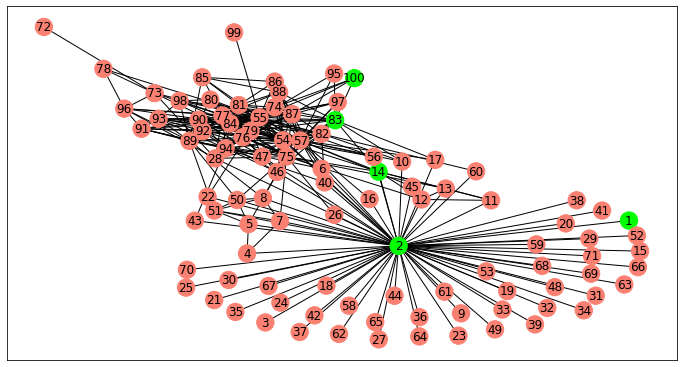

In [16]:
nS=1
nD=100
attr='Kbps_AVG'
find_sp(G,nS,nD,attr)

In [69]:
nS=1
nD=100
attr='Kbps_AVG'
node=2

print("Metrics for network:")
print(f" * degree of connectivity of node {node}: {degree(G,node)}")
print(f" * closeness centrality of node {node}:   {av_sp(G,node,attr):.3f}")
print(f" * betweenness centrality of node {node}: {nb_times_node(G, node,attr)}")
print(f" * network density:                  {density(G):.3f}")
print(f" * network diameter:                 {longest_geodesic(G, attr)}")
print(f" * network average path length:      {av_all_sp(G, attr):.3f}")

max_flow=edmonds_karp(G,nS,nD,attr)
print(f"\n Max Flow from {nS} to {nD}: {max_flow}")

Metrics for network:
 * degree of connectivity of node 2: 70
 * closeness centrality of node 2:   46752.323
 * betweenness centrality of node 2: 7583
 * network density:                  0.065
 * network diameter:                 216064
 * network average path length:      85026.340

 Max Flow from 1 to 100: 74752
